<h1> <div align="center"><a> Проект «Определение перспективных пептидных мишеней для иммунотерапии лейкемии» </a></div> 

<font size="4"><b> Описание проекта </b></font>

Проект был выполнен для PhD студента, который работает в Норвегии и занимается изучением противоопухолевого иммунитета. Было необходимо сопоставить несколько баз данных с целью обнаружения пептидных мишеней, которые потенциально могут быть использованы для  борьбы с лейкемией.

<font size="4"><b> Цель проекта </b></font>

Определить перспективные пептидные мишени, которые могут помочь в поисках новых методов борьбы с лейкемией.

<font size="4"><b> Описание данных </b></font>

Данные представлены несколькими источниками разных форматов и структур:
 1. база данных по медианам экспрессии генов в различных здоровых тканях - файл с расширеним .gct;
 2. база по пептидам, найденным в здоровых тканях - файл с расширением .xlsx;
 3. данные по экспрессии генов в каждом семпле опухоли - 268 файлов формата .gz, которые содержат в названии **normcounts** и лежат в папке со своими дубликатами, отличающихся только частью названия в конце имени;
 4. датасет пептидов из разных генов (Чонг и соавторы) - файл с расширением .xlsx;
 5. датасет пептидов из разных генов (Эрхард и соавторы) - файл с расширением .xlsx;
 6. датасет пептидов из разных генов (Успенская и соавторы) - 2 файла с расширением .xlsx, в одном из которых на 10 листах  находится информация по пептидам и связанным с ними рамками считывания, а в другом база рамок считывания и соответствующих им генов.
 
 
 <font size="4"><b> План работы</b></font>

1. Извлечение и обзор данных.
2. Предобработка данных.
3. Анализ данных:
   * поиск генов, которые в определенных видах здоровых тканей имеют низкий уровень экспрессии (максимальное значение не превышает порог 40), а в опухолевых тканях высокий уровень экспрессии (пороговое значение взять на уровне медианы для 4 квартиля); 
   * на основании полученного списка генов провести поиск в 3 датасетах пептидов из разных генов;
   * провести анализ частоты найденных пептидов в каждом из 3 датасетов;
   * итоговый список пептидов проверить на наличие в базе по пептидам, найденным в здоровых тканях (гипотеза подразумевает, что пептиды, свойственные опухолевым тканям, не должны проявляться в здоровых тканях).
4. Основные выводы.

## Извлечение и обзор данных

In [1]:
pip install matplotlib_venn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import glob
import warnings
from matplotlib import pyplot as plt
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles, venn3_unweighted
#warnings.filterwarnings("ignore")
#pd.set_option("display.max_rows", None)
#pd.set_option("display.max_columns", None)

In [3]:
# база данных по медианам экспрессии генов в различных здоровых тканях; 
# столбец Name - код гена, из которого нам нужна только часть до точки
GTeX = pd.read_csv('C:\\Users\\German.Shakhrul\\Documents\\Python\\Проекты\\pet project\\Phyton\\GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_median_tpm.gct', sep='\t', header = 2)
GTeX.head(1)

,Name,Description,Adipose - Subcutaneous,Adipose - Visceral (Omentum),Adrenal Gland,Artery - Aorta,Artery - Coronary,Artery - Tibial,Bladder,Brain - Amygdala,...,Skin - Not Sun Exposed (Suprapubic),Skin - Sun Exposed (Lower leg),Small Intestine - Terminal Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole Blood
0,ENSG00000223972.5,DDX11L1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.166403,0.0,0.0,0.0,0.0


In [4]:
GTeX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56200 entries, 0 to 56199
Data columns (total 56 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Name                                       56200 non-null  object 
 1   Description                                56200 non-null  object 
 2   Adipose - Subcutaneous                     56200 non-null  float64
 3   Adipose - Visceral (Omentum)               56200 non-null  float64
 4   Adrenal Gland                              56200 non-null  float64
 5   Artery - Aorta                             56200 non-null  float64
 6   Artery - Coronary                          56200 non-null  float64
 7   Artery - Tibial                            56200 non-null  float64
 8   Bladder                                    56200 non-null  float64
 9   Brain - Amygdala                           56200 non-null  float64
 10  Brain - Anterior cingu

In [5]:
# база по пептидам, найденным в здоровых тканях; столбец Sequence - последовательность пептида
HLA = pd.read_excel('C:\\Users\\German.Shakhrul\\Documents\\Python\\Проекты\\pet project\\Phyton\\DBs\\Erhard\\HLA_ligand_S3.xlsx', header=0)
HLA.head(1)

,Delta first,Decoy,Genome,Location,Category,Sequence,Delta next,spectra,Top location count,PEP,...,rank.peptide.redundancy,Sequence.nr,number.patients.shared,patients,best.Q,tissue,best HLA binder,best.peptide,best.ALC,modified
0,0,T,h.ens90,6-:24720379-24720406,UTR5,SAGGPVTVR,100,33,1,0.00311,...,1,SAGGPVTVR,3,"ZH_02, ZH_08, ZH_09",0.0,Cerebellum,strong binder,yes,99,unmodified


In [6]:
HLA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407 entries, 0 to 1406
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delta first              1407 non-null   int64  
 1   Decoy                    1407 non-null   object 
 2   Genome                   1407 non-null   object 
 3   Location                 1407 non-null   object 
 4   Category                 1407 non-null   object 
 5   Sequence                 1407 non-null   object 
 6   Delta next               1407 non-null   int64  
 7   spectra                  1407 non-null   int64  
 8   Top location count       1407 non-null   int64  
 9   PEP                      1407 non-null   float64
 10  Q                        1407 non-null   float64
 11  Hydrophobicity           1407 non-null   float64
 12  Intensity                1373 non-null   float64
 13  Gene                     1378 non-null   object 
 14  Symbol                  

In [7]:
%%time
# соединяем данные по экспрессии генов из 268 файлов семплов опухолей, которые содержат в названии "normcounts", в один файл; 
# столбец gene - код гена
ls_files = glob.glob("C:\\Users\\German.Shakhrul\\Documents\\Python\\Проекты\\pet project\\Phyton\\DBs\\Other\\extr\*")
GSM = pd.DataFrame()
for filename in [filename for filename in ls_files if 'normcounts' in filename]:
    GSM = GSM.join(pd.read_csv(filename, sep='\s+', index_col=0), how = 'outer')
    
GSM = GSM.reset_index()
GSM.head(1)

Wall time: 37.6 s


,gene,sample1,sample2,sample3,sample4,sample5,sample6,sample7,sample8,sample9,...,sample259,sample260,sample261,sample262,sample263,sample264,sample265,sample266,sample267,sample268
0,ENSG00000223972,60.601111,21.320893,28.522763,24.052967,41.857187,21.415686,38.998725,22.141664,34.944688,...,46.629057,25.993103,14.231518,33.493773,28.068022,52.484627,30.02282,19.607693,18.661403,23.657806


In [8]:
GSM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58395 entries, 0 to 58394
Columns: 269 entries, gene to sample268
dtypes: float64(268), object(1)
memory usage: 119.8+ MB


In [9]:
# датасет пептидов из разных генов (Чонг и соавторы); 
# столбец Sequence - код пептида, а Gene_ID - код гена
C_S3_pep = pd.read_excel('C:\\Users\\German.Shakhrul\\Documents\\Python\\Проекты\\pet project\\Phyton\\DBs\\Chong\\S3_peptides.xlsx')
C_S3_pep.head(1)

,Sample name,HLAp category,HLA.class,Charge,Retention Time,Comet.Rank,Comet.Xcorr,Comet.DeltaCn,Comet.SpScore,Comet.NegLogPv,...,MaxQuant.Localisation.Prob,Spectrum,Peptide,Sequence,IsDecoy,Transcript_ID,Gene_ID,Gene_name,ORF_category,Transposable_Element
0,0D5P,lncRNA,HLA-I,2,4338.24,1,2.576,0.409,607.3,4.823909,...,n. def.,20170913_QEh1_LC1_CHC_SA_HLAIp_OD5P_ctrl_2_R1....,VSDEWENLKY,VSDEWENLKY,False,ENST00000604992.1,ENSG00000270194,RP11-259K5.2,NaN,NaN


In [10]:
C_S3_pep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2597 entries, 0 to 2596
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Sample name                 2597 non-null   object 
 1   HLAp category               2597 non-null   object 
 2   HLA.class                   2597 non-null   object 
 3   Charge                      2597 non-null   int64  
 4   Retention Time              2597 non-null   float64
 5   Comet.Rank                  2597 non-null   int64  
 6   Comet.Xcorr                 2597 non-null   object 
 7   Comet.DeltaCn               2597 non-null   object 
 8   Comet.SpScore               2597 non-null   object 
 9   Comet.NegLogPv              2597 non-null   object 
 10  MaxQuant.Mass.Error(ppm)    2569 non-null   object 
 11  MaxQuant.Score              2597 non-null   float64
 12  MaxQuant.DeltaScore         2597 non-null   float64
 13  MaxQuant.Localisation.Prob  1885 

In [11]:
# датасет пептидов из разных генов (Эрхард и соавторы);
# столбец Sequence - код пептида, а Gene - код гена
E_S3_pep = pd.read_excel('C:\\Users\\German.Shakhrul\\Documents\\Python\\Проекты\\pet project\\Phyton\\DBs\\Erhard\\Tables_S1-S4.xlsx', sheet_name=2, header=2)
E_S3_pep.head(1)

,dataset,name,Fraction,Source.File,Feature,Peptide,Scan,Tag.length,ALC....,Length,...,ORF.nterm,ORF.cterm,Region.nterm,Region.length,Region.cterm,Intron.index,Upstream.sequence,Downstream.sequence,HLA.allele,netMHC...rank
0,MM,MM15,27,20141208_QEp7_MiBa_SA_HLA-I-p_MM15_3_A.raw,F27:51287,AAAAAAAKR,F27:4380,9,67,9,...,5,52,12,413,374,-1,AAAA,PGWR,HLA-A*68:01,0.14


In [12]:
E_S3_pep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   dataset               6636 non-null   object 
 1   name                  6636 non-null   object 
 2   Fraction              6636 non-null   int64  
 3   Source.File           6636 non-null   object 
 4   Feature               6636 non-null   object 
 5   Peptide               6636 non-null   object 
 6   Scan                  6636 non-null   object 
 7   Tag.length            6636 non-null   int64  
 8   ALC....               6636 non-null   int64  
 9   Length                6636 non-null   int64  
 10  m.z                   6636 non-null   float64
 11  z                     6636 non-null   int64  
 12  RT                    6636 non-null   float64
 13  Mass                  6636 non-null   float64
 14  ppm                   6636 non-null   float64
 15  local.confidence.... 

In [13]:
%%time
# соединяем информацию по пептидам (Успенская и соавторы) с 10 листов файла excel в одну таблицу;
# столбец sequence - код пептида, а Mapped protein - рамка считывания
O_peptides = pd.DataFrame()
for n in range(10):
    a = pd.read_excel('C:\\Users\\German.Shakhrul\\Documents\\Python\\Проекты\\pet project\\Phyton\\DBs\\Ouspenskaia\\S8_peptides.xlsx', sheet_name = n)
    a['Sample_type'] = n
    O_peptides = O_peptides.append(a)

O_peptides.head(1)

Wall time: 39.1 s


,filename,sequence,Alternative peptides,numPSMsObserved,score,rank2Score,deltaForwardReverseScore,percent_scored_peak_intensity,backbone_cleavage_score,retentionTimeMin,BCS %,Mapped protein,Alternative proteins,mergeType,fdrType,plotType,condType,fdrFilter,Sample_type
0,G20141113_JGA_3rdCML_HLA_combinedIP_hybridmeth...,ALFSKLASA,ALFSKLASA,1,9.87,7.5,3.94,76.9,7,59.65,87.5,ENST00000369535.4_1_1:115250155-115250203:-,ENST00000369535.4_1_1:115250155-115250203:-,3' dORF,3' dORF,3' dORF,nuORF,True,0


In [14]:
O_peptides.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55585 entries, 0 to 1354
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   filename                       55585 non-null  object 
 1   sequence                       55585 non-null  object 
 2   Alternative peptides           55585 non-null  object 
 3   numPSMsObserved                55585 non-null  int64  
 4   score                          55585 non-null  float64
 5   rank2Score                     55047 non-null  float64
 6   deltaForwardReverseScore       55585 non-null  float64
 7   percent_scored_peak_intensity  55585 non-null  float64
 8   backbone_cleavage_score        55585 non-null  int64  
 9   retentionTimeMin               55585 non-null  float64
 10  BCS %                          55585 non-null  float64
 11  Mapped protein                 55585 non-null  object 
 12  Alternative proteins           55585 non-null  

In [15]:
%%time
# база белков и соответствующих им генов (Успенская и соавторы); 
# столбец ORF_ID - рамка считывания, а geneId - код гена, из которого нам нужна только часть до точки
O_S2_nuORF_DB = pd.read_excel('C:\\Users\\German.Shakhrul\\Documents\\Python\\Проекты\\pet project\\Phyton\\DBs\\Ouspenskaia\\S2_nuORF_DB.xlsx')
O_S2_nuORF_DB.head(1)

Wall time: 1min 7s


,ORF_ID,db,transId,geneId,geneName,geneType,transcriptType,ORF_length,predictorType,refinedType,mergeType,plotType,condType
0,ENST00000616016.4_1_1:861321-878072:+,gencode,ENST00000616016.4_1,ENSG00000187634.11_3,SAMD11,protein_coding,protein_coding,1035,canonical,canonical,Canonical,Canonical,Canonical


In [16]:
O_S2_nuORF_DB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323848 entries, 0 to 323847
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ORF_ID          323848 non-null  object
 1   db              323848 non-null  object
 2   transId         323848 non-null  object
 3   geneId          311774 non-null  object
 4   geneName        311708 non-null  object
 5   geneType        308801 non-null  object
 6   transcriptType  320875 non-null  object
 7   ORF_length      323848 non-null  int64 
 8   predictorType   323848 non-null  object
 9   refinedType     323848 non-null  object
 10  mergeType       323848 non-null  object
 11  plotType        323848 non-null  object
 12  condType        323848 non-null  object
dtypes: int64(1), object(12)
memory usage: 32.1+ MB


In [17]:
display(GTeX.duplicated().sum(),
        HLA.duplicated().sum(),
        GSM.duplicated().sum(),
        C_S3_pep.duplicated().sum(),
        E_S3_pep.duplicated().sum(),
        O_peptides.duplicated().sum(),
        O_S2_nuORF_DB.duplicated().sum())

0

0

0

0

0

0

0

### Вывод по извлеченным данным

После извлечения данных мы получили 7 датасетов следующих размеров:
 * **GTeX** - база данных по медианам экспрессии генов в различных здоровых тканях размером 56200 строк и 56 столбцов;
 * **HLA** - база по пептидам, найденным в здоровых тканях, размером 1407 строк и 42 столбца;
 * **GSM** - база данных по экспрессии генов в 286 опухолевых образцах размером 58395 строк и 269 столбцов;
 * **C_S3_pep** - датасет пептидов из разных генов (Чонг и соавторы) размеро 2597 строк и 23 столбцами;
 * **E_S3_pep** - датасет пептидов из разных генов (Эрхард и соавторы) размером 6636 строк и 51 столбец;
 * **O_peptides** - датасет пептидов и рамок считывания (Успенская и соавторы) размером 55585 строк и 19 столбцов;
 * **O_S2_nuORF_DB** - датасет рамок считывания и генов (Успенская и соавторы) размером  323848 строк и 13 столбцов. 
 
 Дубликаты не обнаружены. **Необходимо привести в соответствие названия ключей для последующего объединения таблиц.**

## Предобработка данных

Приведем в соответствие названия ключей для последующего объединения наших датасетов.

In [18]:
# сначала переименуем необходимые столбцы
GTeX = GTeX.rename(columns={'Name':'gene'})
C_S3_pep = C_S3_pep.rename(columns={'Gene_ID':'gene'})
E_S3_pep = E_S3_pep.rename(columns={'Gene':'gene'})
O_peptides = O_peptides.rename(columns={'Mapped protein':'ORF_ID', 'sequence':'Sequence'}) 
O_S2_nuORF_DB = O_S2_nuORF_DB.rename(columns={'geneId':'gene'})

In [19]:
# в таблице GTeX обнаружено почти 12 тысяч строк, в которых значения по всем столбцам равны 0; по согласованию с заказчиком 
# из них удалены только строки, содержащие в Name блок _PAR_Y (они образуют дубли генов), а остальные оставлены без изменений
GTeX['SUM']= GTeX.loc[:, "Adipose - Subcutaneous":"Whole Blood"].sum(axis=1)
GTeX_0 = GTeX.query('SUM == 0')
GTeX_0.head(3)
GTeX_0.shape

(11981, 57)

In [20]:
# найдено и удалено 44 строки, в которых в названии кода гена есть часть _PAR_Y
GTeX['gene_']  = GTeX['gene'].str.contains('_PAR_Y')
#GTeX_PAR_Y = GTeX.query('Name_ != 0')
display(GTeX.query('gene_ != 0').shape)
GTeX = GTeX.query('gene_ == 0')
GTeX.shape

(44, 58)

(56156, 58)

In [21]:
# теперь извлечем код гена из столбцов, где присутствует дополнительная информация после точки
GTeX['gene'] = GTeX['gene'].str[:15]
O_S2_nuORF_DB['gene'] = O_S2_nuORF_DB['gene'].str[:15]

# дубликаты генов в таблицах GTeX и GSM не обнаружены, можно приступать к объединению
display(GTeX['gene'].value_counts().head(3),
GSM['gene'].value_counts().head(3))

ENSG00000223972    1
ENSG00000265432    1
ENSG00000266431    1
Name: gene, dtype: int64

ENSG00000223972    1
ENSG00000223625    1
ENSG00000215572    1
Name: gene, dtype: int64

## Анализ данных
### Поиск перспективных генов

In [22]:
# оставим интересующие нас виды тканей в таблице GTeX (список предоставлен заказчиком)
GTeX_selected = GTeX[['gene', 'Description', 'Artery - Aorta', 'Artery - Coronary', 'Cells - Cultured fibroblasts',
                      'Colon - Sigmoid', 'Esophagus - Mucosa', 'Heart - Left Ventricle', 'Liver', 'Lung', 
                      'Skin - Sun Exposed (Lower leg)', 'Small Intestine - Terminal Ileum']]

# и добавим столбцы с расчетом медианы, минимума, максимума, 5 и 10 процентилей для каждой строки (по просьбе заказчика)

GTeX_selected = GTeX_selected.assign(median = GTeX_selected.iloc[:, 2:12].median(axis=1), 
                                     MIN = GTeX_selected.iloc[:, 2:12].min(axis=1), 
                                     MAX = GTeX_selected.iloc[:, 2:12].max(axis=1), 
                                     quantile_5 = GTeX_selected.iloc[:, 2:12].quantile(q=0.05, axis=1), 
                                     quantile_10 = GTeX_selected.iloc[:, 2:12].quantile(q=0.1, axis=1))
GTeX_selected.head(3)

,gene,Description,Artery - Aorta,Artery - Coronary,Cells - Cultured fibroblasts,Colon - Sigmoid,Esophagus - Mucosa,Heart - Left Ventricle,Liver,Lung,Skin - Sun Exposed (Lower leg),Small Intestine - Terminal Ileum,median,MIN,MAX,quantile_5,quantile_10
0,ENSG00000223972,DDX11L1,0.00000,0.00000,0.0000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000
1,ENSG00000227232,WASH7P,4.04762,3.90076,1.6786,4.64777,3.11749,0.924962,1.76541,4.50841,6.13265,4.19378,3.97419,0.924962,6.13265,1.264099,1.603236
2,ENSG00000278267,MIR6859-1,0.00000,0.00000,0.0000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000


In [23]:
# оставим строки, в которых максимальное значение экспрессии генов не превышает пороговое значение 40, а также только необходимые столбцы
th_GTeX = 40
GTeX_selected_th = GTeX_selected.query('MAX < @th_GTeX')
GTeX_selected_th = GTeX_selected_th[['gene', 'median', 'MIN', 'MAX', 'quantile_5', 'quantile_10']]
GTeX_selected_th.head(1)
GTeX_selected_th.shape
# из 56 200 строк нашему условию удовлетворяет 49 786 (почти 90% выборки)

(49786, 6)

In [24]:
# добавляем столбцы с расчетом медианы, минимума, максимума, 5 и 10 процентили для каждой строки в таблице GSM
GSM = GSM.assign(median = GSM.iloc[:, 1:269].median(axis=1), 
                 MIN = GSM.iloc[:, 1:269].min(axis=1), 
                 MAX = GSM.iloc[:, 1:269].max(axis=1), 
                 quantile_5 = GSM.iloc[:, 1:269].quantile(q=0.05, axis=1), 
                 quantile_10 = GSM.iloc[:, 1:269].quantile(q=0.1, axis=1))
GSM.head(3)

,gene,sample1,sample2,sample3,sample4,sample5,sample6,sample7,sample8,sample9,...,sample264,sample265,sample266,sample267,sample268,median,MIN,MAX,quantile_5,quantile_10
0,ENSG00000223972,60.601111,21.320893,28.522763,24.052967,41.857187,21.415686,38.998725,22.141664,34.944688,...,52.484627,30.022820,19.607693,18.661403,23.657806,26.283049,0.000000,97.289730,9.764863,12.229947
1,ENSG00000227232,289.673311,178.634510,345.993521,300.662089,447.549922,350.438496,308.300728,233.717562,231.844564,...,337.049714,272.206904,200.690509,256.391452,492.870964,300.019281,118.094069,623.814748,179.314291,194.725372
2,ENSG00000278267,7.878144,2.304961,2.480240,8.017656,12.879134,5.840642,8.432157,6.150462,2.688053,...,8.200723,10.007607,2.306787,10.547750,6.900193,6.270928,0.000000,24.004630,1.187100,1.855150


In [25]:
# найдем пороговое значение для опухолевых тканей - по согласованию с заказчиком принято на уровне медианы для Q4 по медианным значениям
GSM['median'].sort_values(ascending=False).head(round(GSM.shape[0]/4)).median()

306.6691

In [26]:
# оставим строки, в которых медиана экспрессии генов превышает пороговое значение, и необходимые столбцы
th_GSM = 307
GSM_th = GSM.query('median > @th_GSM')
GSM_th = GSM_th[['gene', 'median','MIN', 'MAX', 'quantile_5', 'quantile_10']]
GSM_th.shape
# из 58 395 строк нашему условию удовлетворяет 7295 (12,5% выборки)

(7295, 6)

In [27]:
# теперь соединим таблицы GSM_th и GTeX_selected_th по коду гена методом inner.
GTeX_GSM = GTeX_selected_th.merge(GSM_th, on = 'gene', how='inner')
GTeX_GSM.shape
# 3841 ген удовлетворяет сразу обоим условиям

(3841, 11)

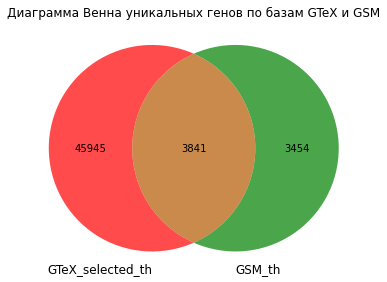

In [28]:
# построим диаграмму Венна для уникальных генов по двум базам
plt.figure(figsize=(6, 6))
venn_diagram = venn2_unweighted(subsets = (GTeX_selected_th.shape[0] - GTeX_GSM.shape[0], 
                                           GSM_th.shape[0] - GTeX_GSM.shape[0], 
                                           GTeX_GSM.shape[0]), 
      set_labels = ('GTeX_selected_th', 'GSM_th'),
      set_colors = ('r', 'g',),
      alpha = 0.7)
plt.title("Диаграмма Венна уникальных генов по базам GTeX и GSM")
plt.show()

### Поиск пептидов по генам
#### База Чонга

In [29]:
# соединим полученный списко генов с датасетом пептидов из разных генов (Чонг и соавторы) методом inner
# нас интересует столбец Sequence - код пептида
GTeX_GSM_vs_C = GTeX_GSM.merge(C_S3_pep, on = 'gene', how = 'inner')
GTeX_GSM_vs_C.head(3)

,gene,median_x,MIN_x,MAX_x,quantile_5_x,quantile_10_x,median_y,MIN_y,MAX_y,quantile_5_y,...,MaxQuant.DeltaScore,MaxQuant.Localisation.Prob,Spectrum,Peptide,Sequence,IsDecoy,Transcript_ID,Gene_name,ORF_category,Transposable_Element
0,ENSG00000215908,19.29530,4.65275,36.5040,8.370942,12.089135,453.296061,149.186937,1945.595808,231.936709,...,10.299,n. def.,20170913_QEh1_LC1_CHC_SA_HLAIp_OD5P_DAC_4_R1.2...,ASKGAGVSF,ASKGAGVSF,False,ENST00000635081.1,CROCCP2,NaN,NaN
1,ENSG00000163866,9.41231,5.53458,14.1052,6.983684,8.432787,444.089300,188.524300,943.000800,292.599840,...,26.243,NaN,20170913_QEh1_LC1_CHC_SA_HLAIp_OD5P_ctrl_4_R1....,KYAPGSLHYF,KYAPGSLHYF,False,ENST00000521580_701_1003,SMIM12,dORF,NaN
2,ENSG00000163866,9.41231,5.53458,14.1052,6.983684,8.432787,444.089300,188.524300,943.000800,292.599840,...,31.107,NaN,20170913_QEh1_LC1_CHC_SA_HLAIp_OD5P_ctrl_4_R2....,KYAPGSLHYF,KYAPGSLHYF,False,ENST00000521580_701_1003,SMIM12,dORF,NaN


In [30]:
# после объединения получился датасет с 229 строками; при этом количество уникальных пептидов всего 43, а уникальных генов 33
# это означает, что один и тот же пептид может встречаться в базе несколько раз, а в одном гене может быть несколько пептидов
display(GTeX_GSM_vs_C.shape,
len(GTeX_GSM_vs_C['Peptide'].unique()),
len(GTeX_GSM_vs_C['gene'].unique()))

GTeX_GSM_vs_C.groupby(['Sequence','gene']).agg({'Peptide':'count'}).sort_values(by = 'Peptide', ascending = False).head(3)

(229, 33)

43

33

,,Peptide
Sequence,gene,
ETDIEMETRY,ENSG00000253738,46
KYMKEKLLF,ENSG00000138399,34
SVRKAGLKM,ENSG00000122783,21


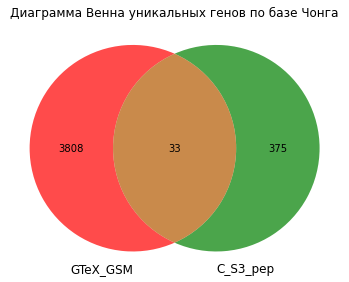

In [31]:
# построим диаграмму Венна для уникальных генов по базе Чонга
plt.figure(figsize=(6, 6))
venn_diagram = venn2_unweighted(subsets = (GTeX_GSM.shape[0] - len(set(GTeX_GSM_vs_C['gene'])),
                                           len(set(C_S3_pep['gene'])) - len(set(GTeX_GSM_vs_C['gene'])),
                                           len(set(GTeX_GSM_vs_C['gene']))), 
      set_labels = ('GTeX_GSM', 'C_S3_pep'),
      set_colors = ('r', 'g'),
      alpha = 0.7)
plt.title("Диаграмма Венна уникальных генов по базе Чонга")
plt.show()

#### База Эрхарда

In [32]:
# соединим полученный списко генов с датасет пептидов из разных генов (Эрхард и соавторы) методом inner
GTeX_GSM_vs_E = GTeX_GSM.merge(E_S3_pep, on = 'gene', how = 'inner')
GTeX_GSM_vs_E.head(3)

,gene,median_x,MIN_x,MAX_x,quantile_5_x,quantile_10_x,median_y,MIN_y,MAX_y,quantile_5_y,...,ORF.nterm,ORF.cterm,Region.nterm,Region.length,Region.cterm,Intron.index,Upstream.sequence,Downstream.sequence,HLA.allele,netMHC...rank
0,ENSG00000189339,25.070900,5.70966,29.5457,7.476891,9.244122,666.818691,275.069369,1875.936813,364.561249,...,45,32,104,761,630,-1,PSTA,PFVV,HLA-A*03:07,0.20
1,ENSG00000198912,18.331100,5.47717,27.0770,8.305433,11.133697,370.127949,172.867543,1216.935274,229.680939,...,5,19,295,732,410,-1,SLLK,LAFL,HLA-A*68:01,0.42
2,ENSG00000069424,6.811605,2.56266,29.8608,2.627474,2.692287,2830.463136,313.596483,8622.571704,1425.141109,...,12,4,253,331,51,-1,TVRQ,IFPL,HLA-B*27:05,0.32


In [33]:
# после объединения получился датасет с 1520 строками; при этом уникальных пептидов тоже 1520, а уникальных генов 1025
# это означает, что в одном и том же гене встречаются несколько пептидов, но сами пептиды уникальны и встречаются в списке 1 раз
display(GTeX_GSM_vs_E.shape,
len(GTeX_GSM_vs_E['Sequence'].unique()),
len(GTeX_GSM_vs_E['gene'].unique()))
GTeX_GSM_vs_E.groupby(['Sequence','gene']).agg({'Peptide':'count'}).sort_values(by = 'Peptide', ascending = False).head(3)

(1520, 61)

1520

1025

,,Peptide
Sequence,gene,
AAAAPAPAA,ENSG00000109381,1
RRFPVPVAM,ENSG00000064393,1
RRKGLNWTL,ENSG00000107099,1


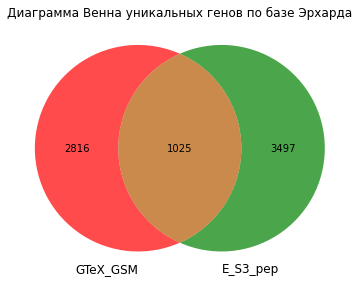

In [34]:
# построим диаграмму Венна для уникальных генов по базе Эрхарда
plt.figure(figsize=(6, 6))
venn_diagram = venn2_unweighted(subsets = (GTeX_GSM.shape[0] - len(set(GTeX_GSM_vs_E['gene'])), 
                                           len(set(E_S3_pep['gene'])) - len(set(GTeX_GSM_vs_E['gene'])), 
                                           len(set(GTeX_GSM_vs_E['gene']))), 
      set_labels = ('GTeX_GSM', 'E_S3_pep'),
      set_colors = ('r', 'g'),
      alpha = 0.7)
plt.title("Диаграмма Венна уникальных генов по базе Эрхарда")
plt.show()

#### База Успенской

In [35]:
# в данных Успенской и соавторов сначала нужно сопоставить пептиды с генами через ключ ORF_ID (рамка считывания)                             
O_pep_gen = O_peptides.merge(O_S2_nuORF_DB, on = 'ORF_ID', how = 'inner')
O_pep_gen.head(3)

# после объединения получился датасет с 12 074 строками (довольно много строк соединить не удалось,
# по согласованию с заказчиком никаких дополнительных действия производить не требуется)
display(O_peptides.shape,
        O_S2_nuORF_DB.shape,
        O_pep_gen.shape)

(55585, 19)

(323848, 13)

(12074, 31)

In [36]:
# теперь соединим список наших генов с датасетом пептидов из разных генов (Успенской и соавторы) по ключу gene методом inner
GTeX_GSM_vs_O = GTeX_GSM.merge(O_pep_gen, on = 'gene', how = 'inner')
GTeX_GSM_vs_O.head(3)

,gene,median_x,MIN_x,MAX_x,quantile_5_x,quantile_10_x,median_y,MIN_y,MAX_y,quantile_5_y,...,transId,geneName,geneType,transcriptType,ORF_length,predictorType,refinedType,mergeType_y,plotType_y,condType_y
0,ENSG00000069424,6.811605,2.56266,29.8608,2.627474,2.692287,2830.463136,313.596483,8622.571704,1425.141109,...,ENST00000341524.5_1,KCNAB2,protein_coding,protein_coding,1122,Trunc,Trunc,Truncated,Canonical,Canonical
1,ENSG00000162408,7.960095,3.07028,10.7898,3.497429,3.924578,841.064019,437.770838,1696.816639,552.850069,...,ENST00000377705.5_1,NOL9,protein_coding,protein_coding,2109,CDS,CDS,Canonical,Canonical,Canonical
2,ENSG00000162408,7.960095,3.07028,10.7898,3.497429,3.924578,841.064019,437.770838,1696.816639,552.850069,...,ENST00000377705.5_1,NOL9,protein_coding,protein_coding,2109,CDS,CDS,Canonical,Canonical,Canonical


In [37]:
# после объединения получился датасет с 2669 строк; уникальных пептидов 1920, а уникальных генов 985
# это означает, что в одном и том же гене встречаются несколько пептидов, а сами пептиды встречаются в датасете несколько раз
display(GTeX_GSM_vs_O.shape,
len(GTeX_GSM_vs_O['Sequence'].unique()),
len(GTeX_GSM_vs_O['gene'].unique()))
GTeX_GSM_vs_O.groupby(['Sequence','gene']).agg({'ORF_ID':'count'}).sort_values(by = 'ORF_ID', ascending = False).head(3)

(2669, 41)

1920

985

,,ORF_ID
Sequence,gene,
SLMGMVLKL,ENSG00000198554,7
MMDPNSTQRY,ENSG00000124571,6
KLHGVNINV,ENSG00000173914,6


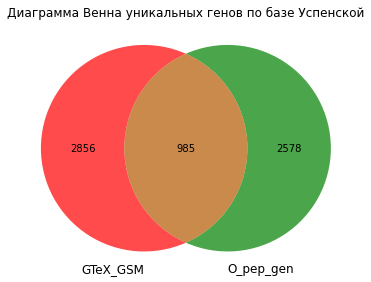

In [38]:
# построим диаграмму Венна для уникальных генов по базе Успенской
plt.figure(figsize=(6, 6))
venn_diagram = venn2_unweighted(subsets = (GTeX_GSM.shape[0] - len(set(GTeX_GSM_vs_O['gene'])), 
                                           len(set(O_pep_gen['gene'])) - len(set(GTeX_GSM_vs_O['gene'])), 
                                           len(set(GTeX_GSM_vs_O['gene']))), 
      set_labels = ('GTeX_GSM', 'O_pep_gen'),
      set_colors = ('r', 'g'),
      alpha = 0.7)
plt.title("Диаграмма Венна уникальных генов по базе Успенской")
plt.show()

### Анализ частотности пептидов 

In [39]:
# создадим сводную таблицу по результатам наших объединений
cols = ['Показатель', "Чонг и соавт.", "Эрхард и соавт.", "Успенская и соавт."]

data = [["Число строк после объединения", 
          GTeX_GSM_vs_C.shape[0], 
          GTeX_GSM_vs_E.shape[0], 
          GTeX_GSM_vs_O.shape[0]],
        ["Количество уникальных пептидов", 
          len(GTeX_GSM_vs_C['Sequence'].unique()), 
          len(GTeX_GSM_vs_E['Sequence'].unique()), 
          len(GTeX_GSM_vs_O['Sequence'].unique())], 
        ["Количество уникальных генов",
          len(GTeX_GSM_vs_C['gene'].unique()), 
          len(GTeX_GSM_vs_E['gene'].unique()), 
          len(GTeX_GSM_vs_O['gene'].unique())]]

pd.DataFrame(data = data, columns = cols).set_index('Показатель')
# после соединения таблиц GTeX_GSM и 3 датасетов были получены следующие срезы:

,Чонг и соавт.,Эрхард и соавт.,Успенская и соавт.
Показатель,,,
Число строк после объединения,229,1520,2669
Количество уникальных пептидов,40,1520,1920
Количество уникальных генов,33,1025,985


Различия между строками внутри одного столбца означают: 
* один и тот же пептид может встречаться в срезе несколько раз (за исключением базы Эрхарда, где все пептиды уникальны);
* один ген может содержать несколько пептидов.

In [40]:
# найдем пересечения пептидов между датасетами
set_C = set(GTeX_GSM_vs_C['Sequence'])
set_E = set(GTeX_GSM_vs_E['Sequence'])
set_O = set(GTeX_GSM_vs_O['Sequence'])

C_vs_O = set_C - (set_C - set_O)
C_vs_E = set_C - (set_C - set_E)
E_vs_O = set_E - (set_E - set_O)
C_vs_O_vs_E = C_vs_O-(C_vs_O - E_vs_O)

display(len(C_vs_O), len(C_vs_E), len(E_vs_O), len(C_vs_O_vs_E))
C_vs_O_vs_E 

5

15

88

4

{'IFNPVSKNF', 'KYMKEKLLF', 'NSSDHVLLY', 'VTEKVYADTGLY'}

Таким образом, **во всех трех датасетах встречается всего 4 пептида 'IFNPVSKNF', 'KYMKEKLLF', 'NSSDHVLLY', 'VTEKVYADTGLY'**.   

В двух датасетах встречается уже (5-4) + (15-4) + (88-4) = 96 пептидов. Построим диаграммму Венна для уникальных пептидов из всех трех датасетов.

In [41]:
len(set_O - set_E - set_C)

1831

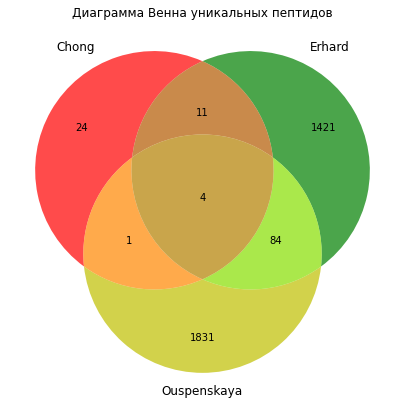

In [42]:
plt.figure(figsize=(7, 7))
venn_diagram = venn3_unweighted(subsets = ( len(set_C - set_E - set_O), 
                                            len(set_E - set_C - set_O), 
                                            len(C_vs_E - C_vs_O_vs_E), 
                                            len(set_O - set_E - set_C), 
                                            len(C_vs_O - C_vs_O_vs_E), 
                                            len(E_vs_O - C_vs_O_vs_E), 
                                            len(C_vs_O_vs_E)), 
      set_labels = ('Chong', 'Erhard', 'Ouspenskaya'),
      set_colors = ('r', 'g', 'y'),
      alpha = 0.7)
plt.title("Диаграмма Венна уникальных пептидов")
plt.show()

In [43]:
# составим список пептидов, которые находятся на пересечении датасетов
GTeX_GSM_vs_all = list(C_vs_O.union(C_vs_E, E_vs_O))
len(GTeX_GSM_vs_all)

100

In [44]:
# составим список пептидов из всех трех датасетов
list_combined = list(set_C) + list(set_E) + list(set_O)
list_combined = pd.DataFrame(list_combined)
list_combined.columns = ['Sequence']
len(list_combined)

3480

In [45]:
# теперь создадим сводную таблицу с указанием частотности пептидов в каждом датсете
GTeX_GSM_vs_all = pd.DataFrame(GTeX_GSM_vs_all)
GTeX_GSM_vs_all.columns = ['Sequence']
GTeX_GSM_vs_all['Chong'] = GTeX_GSM_vs_all['Sequence'].apply(lambda x: len(GTeX_GSM_vs_C[GTeX_GSM_vs_C['Sequence'] == x]))
GTeX_GSM_vs_all['Erhard'] = GTeX_GSM_vs_all['Sequence'].apply(lambda x: len(GTeX_GSM_vs_E[GTeX_GSM_vs_E['Sequence'] == x]))
GTeX_GSM_vs_all['Ouspenskaya'] = GTeX_GSM_vs_all['Sequence'].apply(lambda x: len(GTeX_GSM_vs_O[GTeX_GSM_vs_O['Sequence'] == x]))
GTeX_GSM_vs_all['All_datasets_frequency'] = GTeX_GSM_vs_all['Chong'] + GTeX_GSM_vs_all['Erhard'] + GTeX_GSM_vs_all['Ouspenskaya']
GTeX_GSM_vs_all['No_datasets_occurrence'] = GTeX_GSM_vs_all['Sequence'].apply(lambda x: len(list_combined[list_combined['Sequence'] == x]))

GTeX_GSM_vs_all.sort_values(by = "All_datasets_frequency", ascending = False).head()

,Sequence,Chong,Erhard,Ouspenskaya,All_datasets_frequency,No_datasets_occurrence
20,ETDIEMETRY,46,1,0,47,2
30,KYMKEKLLF,34,1,3,38,3
68,VTEKVYADTGLY,20,1,5,26,3
6,APRAAPPAGA,10,1,0,11,2
69,SLMGMVLKL,0,1,7,8,2


In [47]:
# в конце добавим столбец, который будет указывать, встречаются ли наши пептиды в базе пептидов HLA, найденныx в здоровых тканях
GTeX_GSM_vs_all['HLA'] = GTeX_GSM_vs_all['Sequence'].apply(lambda x: 'yes' if x in set(HLA['Sequence']) else 'no')
GTeX_GSM_vs_all.groupby('HLA')['Sequence'].count() 

HLA
no     59
yes    41
Name: Sequence, dtype: int64

**Таким образом, 59 пептидов из 100 не встречается в базе пептидов здоровых тканей.**

In [48]:
# отсортируем итоговую таблицу по столбцам No_datasets_occurrence и All_datasets_frequency
GTeX_GSM_vs_all = GTeX_GSM_vs_all.sort_values(by = ['No_datasets_occurrence', 'All_datasets_frequency'], ascending = False).reset_index(drop = True)
GTeX_GSM_vs_all.head()

,Sequence,Chong,Erhard,Ouspenskaya,All_datasets_frequency,No_datasets_occurrence,HLA
0,KYMKEKLLF,34,1,3,38,3,yes
1,VTEKVYADTGLY,20,1,5,26,3,no
2,IFNPVSKNF,1,1,2,4,3,yes
3,NSSDHVLLY,1,1,1,3,3,yes
4,ETDIEMETRY,46,1,0,47,2,no


In [49]:
# сохраним полученную таблицу в Excel
GTeX_GSM_vs_all.to_excel('C:\\Users\\German.Shakhrul\\Documents\\Python\\Проекты\\pet project\\GTeX_GSM_vs_all.xlsx')

### Основные выводы

На основании проведенного анализа можно сделать следующие выводы:
1.  При использовании порогового значения 40 в таблице GTeX из 56 200 строк этому условию удовлетворяет 49 786 (почти 90% выборки), в то время как пороговое значение 307 для таблицы GSM из сопоставимой выборки в 58 395 строк остается только 7 295 (12,5% выборки). Возможно, стоит пересмотреть порог 40 и, например, исключить нулевые строки.
2. В источниках Успенской удалось установить связь пептид - ген только для 12 074 строк из 55 585 (22% всей выборки). Вероятно, результат можно улучшить, но для этого требуется описание исходных данных с указанием логики формирования столбцов;
2. После соединения таблиц GTeX и GSM был получен список из 3 841 гена, которые удовлетворяют сразу обоим условиям. Этот список мы пропустили по 3 датасетам и у Чонга нашли 33 гена, у Эрхарда 1025, а у Успенской 985 генов из полученного списка.
3. Поскольку однин ген может содержать сразу несколько пептидов, то число уникальных генов несколько шире: у Чонга - 40, у Эрхарда - 1520, а у Успенской - 1920 пептидов.
4. Построив пересечение 3 множеств, мы обнаружили 4 пептида ( 'IFNPVSKNF', 'KYMKEKLLF', 'NSSDHVLLY', 'VTEKVYADTGLY'), которые присутствуют во всех трех датасетах, и еще 96 пептидов, которые встречаются в двух датасетах.
5. Итоговый список пептидов был сверен с базой пептидов, найденным в здоровых тканях: из списка в 100 пептидов 59 не обнаружено в этой базе, в том числе пептид VTEKVYADTGLY, который встретился во всех 3 датасетах.